In [1]:
import numpy as np
import matplotlib.pyplot as plt

def g2_model_3p7K(t, t0, T1, T2, Omega):
    """Analytic g^(2)(t) model from Phys. Rev. A 94, 063839 (2016)."""
    t = np.asarray(t)
    invT1, invT2 = (1 / T1, 1 / T2)
    p = invT1 + invT2
    q = np.sqrt((invT1 - invT2) ** 2 - 4 * Omega ** 2 + 0j)
    dt = np.abs(t - t0)
    out = 1 - (p + q) / (2 * q) * np.exp(-0.5 * (p - q) * dt) + (p - q) / (2 * q) * np.exp(-0.5 * (p + q) * dt)
    return np.real(out)
FNAME = 'Bidirectional_histogram_2025-09-29_180310_480nW_mol2_6K.txt'
try:
    data = np.loadtxt(FNAME, skiprows=1)
except Exception:
    lines = []
    with open(FNAME) as f:
        for line in f:
            try:
                float(line.split()[0])
                lines.append(line)
            except Exception:
                continue
    data = np.loadtxt(lines)
t = data[:, 0]
counts = data[:, 1]
tail_fraction = 0.1
idx = np.argsort(np.abs(t))
n_tail = max(1, int(len(t) * tail_fraction))
baseline = np.mean(counts[idx[-n_tail:]])
g2 = counts / baseline
t0_guess = -51800.0
T1_guess = 5000.0
T2_guess = 1000.0
Omega_guess = 0.0001

In [2]:
from scipy.optimize import least_squares
window_center_3p7K = t0_guess
window_half_width_3p7K = 20000.0
mask = (t >= window_center_3p7K - window_half_width_3p7K) & (t <= window_center_3p7K + window_half_width_3p7K)
t_win_3p7K = t[mask]
g2_win_3p7K = g2[mask]
counts_win = counts[mask]
sigma = np.sqrt(np.clip(counts_win, 1.0, None)) / baseline
print(f'Fit window: from {t_win_3p7K.min():.1f} to {t_win_3p7K.max():.1f} (width = {2 * window_half_width_3p7K:.0f})')

def residuals(params):
    t0, T1, T2, Omega = params
    model = g2_model_3p7K(t_win_3p7K, t0, T1, T2, Omega)
    return (model - g2_win_3p7K) / sigma
initial = [t0_guess, T1_guess, T2_guess, Omega_guess]
lower = [t.min(), 1e-09, 1e-09, 0.0]
upper = [t.max(), np.inf, np.inf, np.inf]
lsq = least_squares(residuals, initial, bounds=(lower, upper), loss='soft_l1', verbose=2, max_nfev=200000)
popt_3p7K = lsq.x
print('\nFitted parameters:')
for name, val in zip(['t0', 'T1', 'T2', 'Omega'], popt_3p7K):
    print(f'  {name:6s} = {val:.6g}')
fit_result_3p7K = {'popt': popt_3p7K, 'window_center': window_center_3p7K, 'window_half_width': window_half_width_3p7K, 't_win': t_win_3p7K, 'g2_win': g2_win_3p7K, 'sigma': sigma}

Fit window: from -71800.0 to -31800.0 (width = 40000)
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7808e+01                                    2.49e+04    
       1              2         8.0819e+00      1.97e+01       4.63e+02       8.31e+03    
       2              3         6.0093e+00      2.07e+00       5.16e+02       2.87e+03    
       3              4         5.7219e+00      2.87e-01       1.80e+02       1.10e+03    
       4              5         5.5616e+00      1.60e-01       1.24e+02       6.67e+02    
       5              6         5.5211e+00      4.04e-02       2.97e+01       2.62e+01    
       6              7         5.5202e+00      9.67e-04       3.25e+02       1.98e+01    
       7              8         5.5201e+00      4.35e-05       1.97e+00       9.75e-01    
       8              9         5.5201e+00      6.10e-07       1.54e+01       2.06e-01    
       9             10         5.52

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def g2_model_6K(t, t0, T1, T2, Omega):
    """Analytic g^(2)(t) model from Phys. Rev. A 94, 063839 (2016)."""
    t = np.asarray(t)
    invT1, invT2 = (1 / T1, 1 / T2)
    p = invT1 + invT2
    q = np.sqrt((invT1 - invT2) ** 2 - 4 * Omega ** 2 + 0j)
    dt = np.abs(t - t0)
    out = 1 - (p + q) / (2 * q) * np.exp(-0.5 * (p - q) * dt) + (p - q) / (2 * q) * np.exp(-0.5 * (p + q) * dt)
    return np.real(out)
FNAME = 'Bidirectional_histogram_2025-09-29_172419_480nW_mol2.txt'
try:
    data = np.loadtxt(FNAME, skiprows=1)
except Exception:
    lines = []
    with open(FNAME) as f:
        for line in f:
            try:
                float(line.split()[0])
                lines.append(line)
            except Exception:
                continue
    data = np.loadtxt(lines)
t = data[:, 0]
counts = data[:, 1]
tail_fraction = 0.1
idx = np.argsort(np.abs(t))
n_tail = max(1, int(len(t) * tail_fraction))
baseline = np.mean(counts[idx[-n_tail:]])
g2 = counts / baseline
t0_guess = -51800.0
T1_guess = 5000.0
T2_guess = 1000.0
Omega_guess = 0.0001

In [4]:
from scipy.optimize import least_squares
window_center_6K = t0_guess
window_half_width_6K = 20000.0
mask = (t >= window_center_6K - window_half_width_6K) & (t <= window_center_6K + window_half_width_6K)
t_win_6K = t[mask]
g2_win_6K = g2[mask]
counts_win = counts[mask]
sigma = np.sqrt(np.clip(counts_win, 1.0, None)) / baseline
print(f'Fit window: from {t_win_6K.min():.1f} to {t_win_6K.max():.1f} (width = {2 * window_half_width_6K:.0f})')

def residuals(params):
    t0, T1, T2, Omega = params
    model = g2_model_6K(t_win_6K, t0, T1, T2, Omega)
    return (model - g2_win_6K) / sigma
initial = [t0_guess, T1_guess, T2_guess, Omega_guess]
lower = [t.min(), 1e-09, 1e-09, 0.0]
upper = [t.max(), np.inf, np.inf, np.inf]
lsq = least_squares(residuals, initial, bounds=(lower, upper), loss='soft_l1', verbose=2, max_nfev=200000)
popt_6K = lsq.x
print('\nFitted parameters:')
for name, val in zip(['t0', 'T1', 'T2', 'Omega'], popt_6K):
    print(f'  {name:6s} = {val:.6g}')
fit_result_6K = {'popt': popt_6K, 'window_center': window_center_6K, 'window_half_width': window_half_width_6K, 't_win': t_win_6K, 'g2_win': g2_win_6K, 'sigma': sigma}

Fit window: from -71800.0 to -31800.0 (width = 40000)
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.4410e+01                                    2.63e+04    
       1              2         1.2846e+01      2.16e+01       4.97e+02       1.22e+04    
       2              3         8.9178e+00      3.93e+00       6.30e+02       3.13e+03    
       3              4         7.1644e+00      1.75e+00       3.88e+02       6.10e+01    
       4              6         6.7154e+00      4.49e-01       1.60e+02       7.17e+02    
       5              7         5.9862e+00      7.29e-01       3.18e+02       5.88e+02    
       6              8         5.3056e+00      6.81e-01       6.36e+02       3.49e+03    
       7              9         5.0496e+00      2.56e-01       1.27e+03       2.66e+02    
       8             11         5.0135e+00      3.61e-02       6.36e+02       4.12e+02    
       9             13         5.01

## Combined figure (side-by-side)
Only the variables referenced by the original final plot cells were renamed to avoid collisions:

- 3.7 K suffix: `_3p7K` (renamed: fit_result, g2_fit, g2_fit_2, g2_model, g2_win, popt, t_fit, t_win, window_center, window_half_width)
- 6 K suffix: `_6K` (renamed: fit_result, g2_fit, g2_fit_2, g2_model, g2_win, popt, t_fit, t_win, window_center, window_half_width)

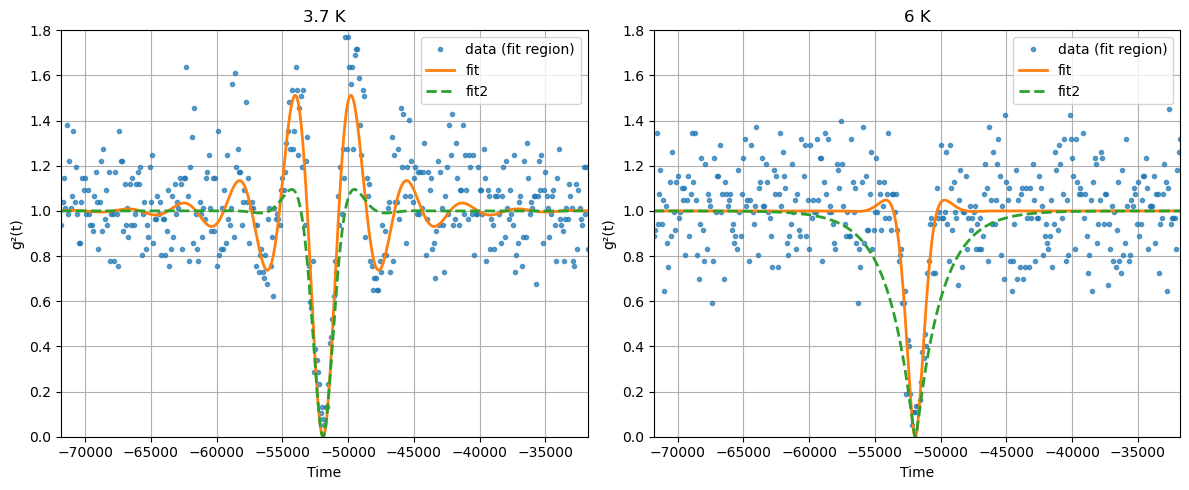

In [7]:
# Combined side-by-side figure (Option 2 selective renaming)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left panel: 3.7 K
plt.sca(axes[1])
popt_3p7K = fit_result_3p7K['popt']
window_center_3p7K = fit_result_3p7K['window_center']
window_half_width_3p7K = fit_result_3p7K['window_half_width']
t_win_3p7K = fit_result_3p7K['t_win']
g2_win_3p7K = fit_result_3p7K['g2_win']
t_fit_3p7K = np.linspace(t_win_3p7K.min(), t_win_3p7K.max(), 2000)
g2_fit_3p7K = g2_model_3p7K(t_fit_3p7K, *popt_3p7K)
g2_fit_2_3p7K = g2_model_3p7K(t_fit_3p7K, popt_3p7K[0], popt_3p7K[1], popt_3p7K[2] / 5, popt_3p7K[3])
plt.plot(t_win_3p7K, g2_win_3p7K, 'o', ms=3, alpha=0.7, label='data (fit region)')
plt.plot(t_fit_3p7K, g2_fit_3p7K, '-', lw=2, label='fit')
plt.plot(t_fit_3p7K, g2_fit_2_3p7K, '--', lw=2, label='fit2')
plt.xlabel('Time')
plt.ylabel('g²(t)')
plt.xlim(t_win_3p7K.min(), t_win_3p7K.max())
plt.ylim(0, 1.8)
plt.legend()
plt.grid(True)
plt.title(f'Fit result around t₀ ≈ {popt_3p7K[0]:.0f}, window ±{window_half_width_3p7K:.0f}')

# Right panel: 6 K
plt.sca(axes[0])
popt_6K = fit_result_6K['popt']
window_center_6K = fit_result_6K['window_center']
window_half_width_6K = fit_result_6K['window_half_width']
t_win_6K = fit_result_6K['t_win']
g2_win_6K = fit_result_6K['g2_win']
t_fit_6K = np.linspace(t_win_6K.min(), t_win_6K.max(), 2000)
g2_fit_6K = g2_model_6K(t_fit_6K, *popt_6K)
g2_fit_2_6K = g2_model_6K(t_fit_6K, popt_6K[0], popt_6K[1], popt_6K[2] / 5, popt_6K[3])
plt.plot(t_win_6K, g2_win_6K, 'o', ms=3, alpha=0.7, label='data (fit region)')
plt.plot(t_fit_6K, g2_fit_6K, '-', lw=2, label='fit')
plt.plot(t_fit_6K, g2_fit_2_6K, '--', lw=2, label='fit2')
plt.xlabel('Time')
plt.ylabel('g²(t)')
plt.xlim(t_win_6K.min(), t_win_6K.max())
plt.ylim(0, 1.8)
plt.legend()
plt.grid(True)
plt.title(f'Fit result around t₀ ≈ {popt_6K[0]:.0f}, window ±{window_half_width_6K:.0f}')

axes[1].set_title("6 K")
axes[0].set_title("3.7 K")
plt.tight_layout()
plt.show()
